<a href="https://colab.research.google.com/github/Vakhranev/Heritage/blob/main/%D0%9F%D0%BE%D0%B2%D1%82%D0%BE%D1%80%D1%8B%20%D0%BA%D0%BE%D0%BB%D0%BB%D0%BE%D0%BA%D0%B0%D1%86%D0%B8%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

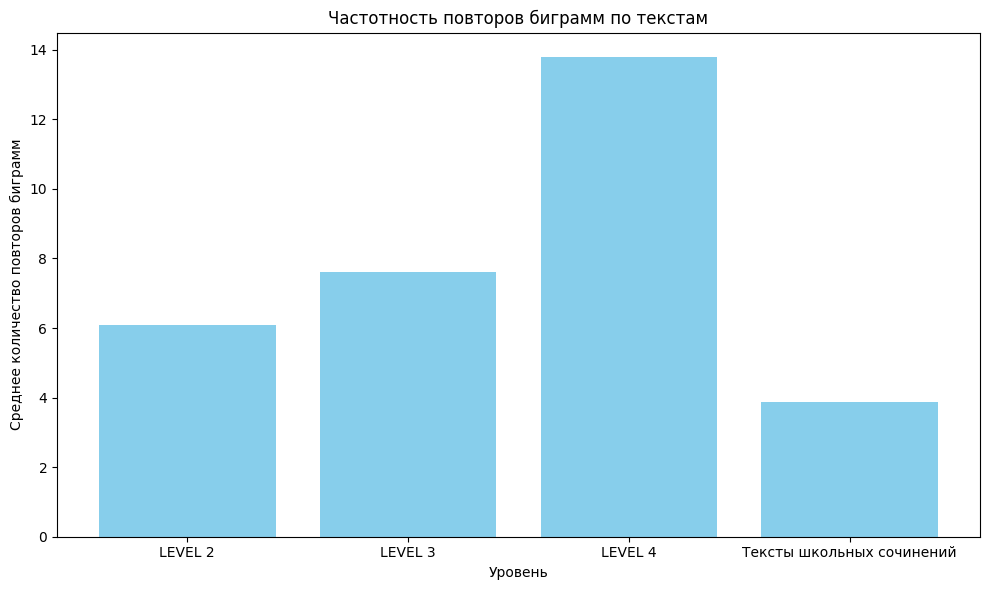


Статистика для LEVEL 2:
  Среднее = 6.10, Макс = 22, Мин = 1, Всего повторов = 122

Статистика для LEVEL 3:
  Среднее = 7.62, Макс = 17, Мин = 2, Всего повторов = 61

Статистика для LEVEL 4:
  Среднее = 13.80, Макс = 34, Мин = 1, Всего повторов = 566

Статистика для Тексты школьных сочинений:
  Среднее = 3.87, Макс = 26, Мин = 0, Всего повторов = 89


In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Функция для подсчета повторяющихся биграмм
def count_repeated_bigrams(text):
    tokens = text.split()
    bigrams = [f"{tokens[i]} {tokens[i+1]}" for i in range(len(tokens) - 1)]
    bigram_count = Counter(bigrams)
    repeated = sum(1 for count in bigram_count.values() if count > 1)
    return repeated

# Чтение данных
with open('updated_america_texts_last.json', 'r', encoding='utf-8') as f:
    america_texts = json.load(f)

with open('final_school.json', 'r', encoding='utf-8') as f:
    lib_texts = json.load(f)

with open('files_by_levels.txt', 'r', encoding='utf-8') as f:
    files_by_levels = {'LEVEL 2': [], 'LEVEL 3': [], 'LEVEL 4': []}
    current_level = None
    for line in f:
        line = line.strip()
        if line.startswith('LEVEL'):
            current_level = line
        elif line and current_level:
            files_by_levels[current_level].append(line)

# Анализ данных
def analyze_by_level(files, data):
    all_repeated = []
    detailed_stats = []

    for file in files:
        if file in data:
            text = data[file]['text']
            repeated = count_repeated_bigrams(text)
            all_repeated.append(repeated)
            detailed_stats.append(repeated)

    return np.mean(all_repeated) if all_repeated else 0, detailed_stats

# Анализ для каждого уровня и художественных текстов
repeated_results = {}
detailed_stats = {}

for level, files in files_by_levels.items():
    repeated_results[level], detailed_stats[level] = analyze_by_level(files, america_texts)

lib_repeated, lib_detailed_stats = analyze_by_level(lib_texts.keys(), lib_texts)

# Визуализация результатов
levels = list(repeated_results.keys()) + ['Тексты школьных сочинений']
values = [repeated_results[level] for level in repeated_results] + [lib_repeated]

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(levels, values, color='skyblue')

ax.set_xlabel('Уровень')
ax.set_ylabel('Среднее количество повторов биграмм')
ax.set_title('Частотность повторов биграмм по текстам')

plt.tight_layout()
plt.savefig('repeats_analysis.png')
plt.show()

# Текстовая статистика
def print_stats(stats, label):
    print(f"\nСтатистика для {label}:")
    print(f"  Среднее = {np.mean(stats):.2f}, Макс = {np.max(stats)}, Мин = {np.min(stats)}, Всего повторов = {np.sum(stats)}")

for level, stats in detailed_stats.items():
    print_stats(stats, level)

print_stats(lib_detailed_stats, 'Тексты школьных сочинений')